# Email Spam Classifier

The project is to implement a Spam Filter with the help of a ML classifier which would classify a given mail as spam or ham

In [1]:
#Import the libraries
import os
import re
from nltk import word_tokenize, WordNetLemmatizer
from nltk.corpus import stopwords
from collections import Counter
import operator
import matplotlib
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
#from sklearn import cross_validation
from sklearn.model_selection import train_test_split


## Reading Data

In [2]:

def init_lists(folder):
    a_list = []
    file_list = os.listdir(folder)
    for a_file in file_list:
        f = open(folder + a_file, 'r', encoding="utf8")
        try:
            a_list.append(f.read())
        except UnicodeDecodeError:
            #print(a_file)
            continue
    f.close()
    return a_list

In [22]:
SpamFolderName =  'EmailSpamData/Spam/'
HamFolderName = 'EmailSpamData/easy_ham_2/'
stoplist = stopwords.words('english')
spamMailList = init_lists(SpamFolderName)
hamMailList = init_lists(HamFolderName)

## Processing Data

In [23]:
def preprocess(email):
    # replace html tag
    email = re.sub(r"<[^<>]+>", " ", email)

    # replace 0-9 with number 
    email = re.sub(r"[0-9]+", "number", email)


    # replace hyperlinks with 'httpaddr'
    email = re.sub(r"(http|https)://[^\s]*", "httpaddr", email)


    # replace any email address with 'emailaddr'
    email = re.sub(r"[^\s]+@[^\s]+", "emailaddr", email) 

    # replace $ with 'dollar'
    email = re.sub(r"[$]+", "dollar", email) 
    
    #tokenize
    tokens = word_tokenize(email)
    
    #take only alphanumeric
    alphaNumericTokens =  [word for word in tokens if word.isalpha()]
    
    #lemmatize and change case to lower
    lemmatizedAlphaNumericTokens = [WordNetLemmatizer().lemmatize(word.lower()) for word in alphaNumericTokens]

    #filter stoplist words
    return [word for word in lemmatizedAlphaNumericTokens if not word in stoplist]

In [123]:
processedSpamMailList = [ preprocess(email)for email in spamMailList]
processedHamMailList = [ preprocess(email)for email in hamMailList]

In [113]:
def get_wordFrequency(words):
    return {word: count for word, count in Counter(words).items()}

In [114]:
spamMailWordFrequencyList = [get_wordFrequency(words) for words in processedSpamMailList]
hamMailWordFrequencyList = [get_wordFrequency(words) for words in processedHamMailList]

In [115]:
allSpamWordFrequency = dict(sum((Counter(x) for x in spamMailWordFrequencyList),Counter()))
allHamWordFrequency = dict(sum((Counter(x) for x in hamMailWordFrequencyList),Counter()))

In [116]:
sorted_allSpamWordFrequency = sorted(allSpamWordFrequency.items(), key=operator.itemgetter(1), reverse=True)
sorted_allHamWordFrequency = sorted(allHamWordFrequency.items(), key=operator.itemgetter(1), reverse=True)

## Visualizing Data

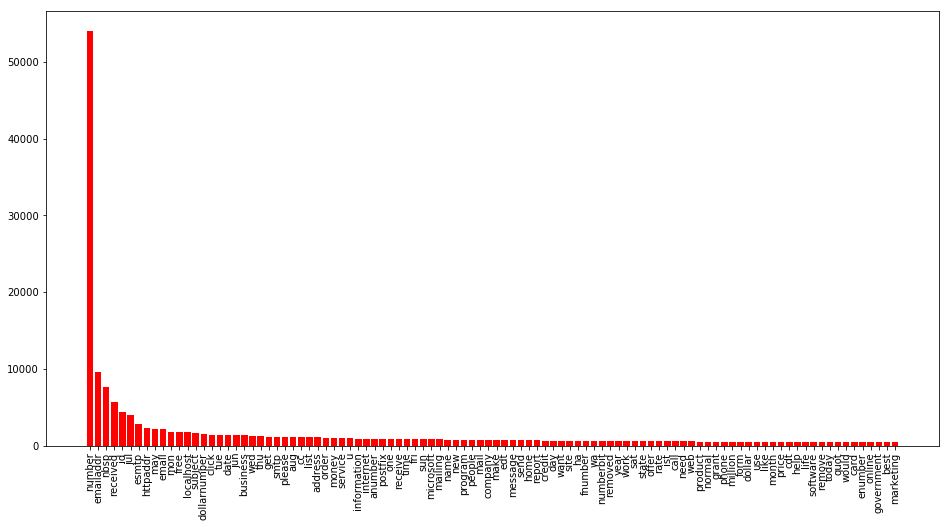

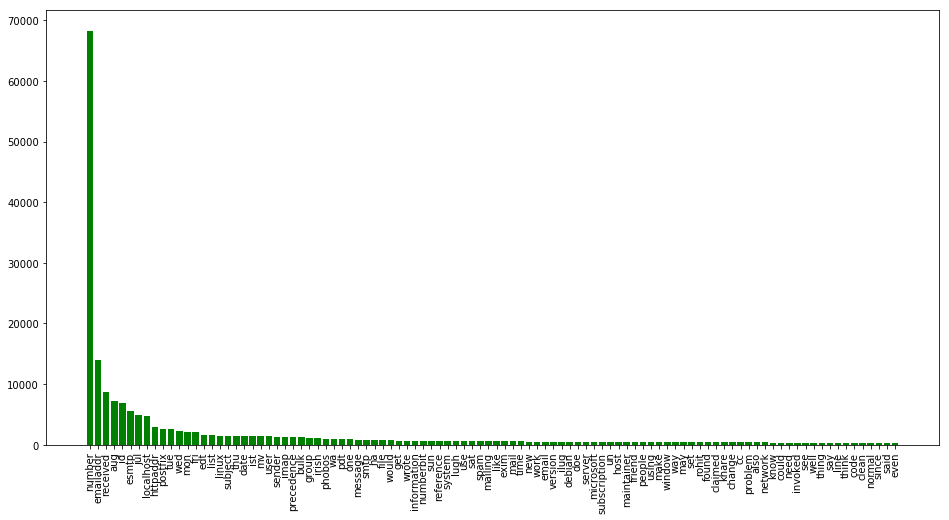

In [117]:
#Plot Top 100 SPAM word and its frequency
dataLength = len(sorted_allSpamWordFrequency) if len(sorted_allSpamWordFrequency)<100 else 100
spamWords, spamWordsFrequency = zip(*sorted_allSpamWordFrequency[0:dataLength])

x_pos = np.arange(dataLength) 

plt.figure(figsize=(16, 8))
plt.bar(x_pos, spamWordsFrequency,color='r')
plt.xticks(x_pos, spamWords, rotation='vertical') 
plt.show()


#Plot Top 100 HAM word and its frequency

dataLength = len(sorted_allHamWordFrequency) if len(sorted_allHamWordFrequency)<100 else 100
hamWords, hamWordsFrequency = zip(*sorted_allHamWordFrequency[0:dataLength])

x_pos = np.arange(dataLength) 
plt.figure(figsize=(16, 8))
plt.bar(x_pos, hamWordsFrequency,color='g')
plt.xticks(x_pos, hamWords, rotation='vertical') 
plt.show()


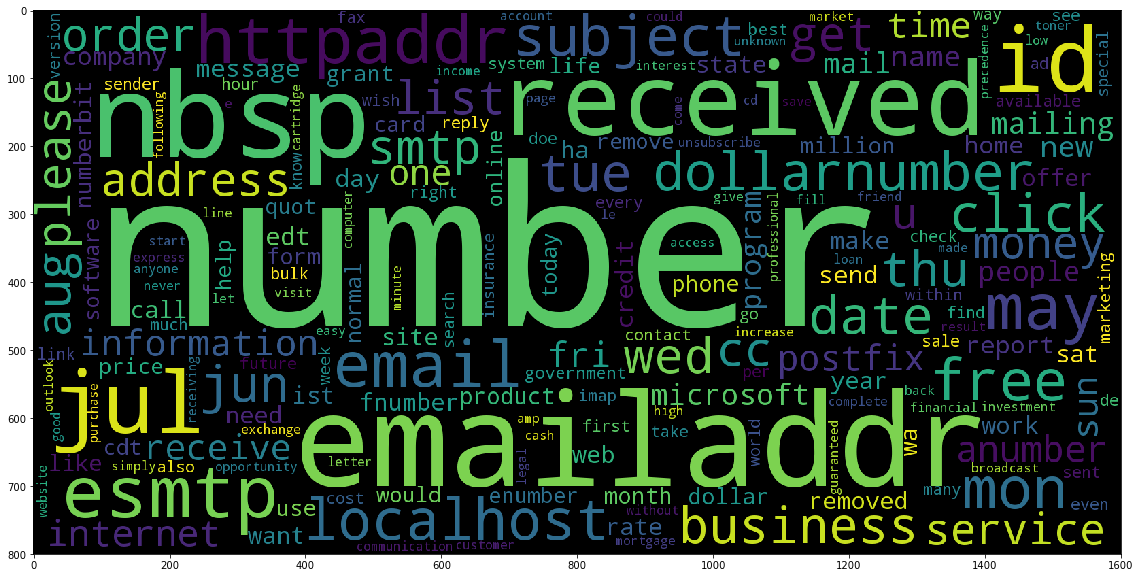

In [118]:
wcSpam = WordCloud(width=1600, height=800).generate_from_frequencies(allSpamWordFrequency)
matplotlib.pyplot.figure( figsize=(20,10) )
matplotlib.pyplot.imshow(wcSpam)
matplotlib.pyplot.show()

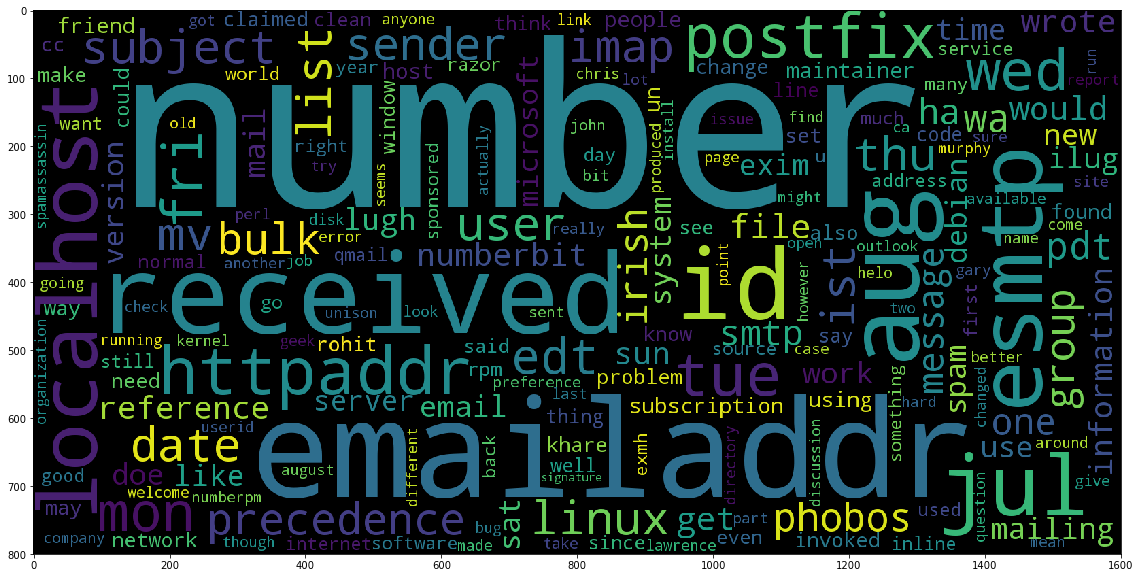

In [119]:
wcHam = WordCloud(width=1600, height=800).generate_from_frequencies(allHamWordFrequency)
matplotlib.pyplot.figure( figsize=(20,10) )
matplotlib.pyplot.imshow(wcHam)
matplotlib.pyplot.show()

# Featrue Extraction
In the Below Section we will find the feature by analysing the frequency of words in Spam and Ham Mails

In [120]:
#filter those words only which are used more than .1% time  occurance
spamCutoffFrequency = len(allSpamWordFrequency)*.001
hamCutoffFrequency = len(allHamWordFrequency)*.001

spamWordHighFrequency = {k: v for k, v in allSpamWordFrequency.items() if v > spamCutoffFrequency}
hamWordHighFrequency = {k: v for k, v in allHamWordFrequency.items() if v > hamCutoffFrequency}



In [208]:
# consolidate the keys of spam and ham to get the features
features = list(spamWordHighFrequency.keys())+  list(set(hamWordHighFrequency.keys()) - set(spamWordHighFrequency.keys()) )

print ("Feature columns ({} total features):\n{}".format(len(X_all.columns), list(X_all.columns)))

Feature columns (2646 total features):
['emailaddr', 'tue', 'aug', 'number', 'received', 'localhost', 'postfix', 'esmtp', 'id', 'edt', 'phobos', 'imap', 'ist', 'fri', 'host', 'claimed', 'date', 'start', 'subject', 'stop', 'mlm', 'sender', 'precedence', 'bulk', 'irish', 'linux', 'user', 'group', 'receiving', 'letter', 'interest', 'information', 'online', 'business', 'opportunity', 'please', 'accept', 'apology', 'mailing', 'removal', 'necessary', 'marketing', 'read', 'could', 'important', 'one', 'ha', 'ever', 'huge', 'mistake', 'people', 'failed', 'deliver', 'promise', 'past', 'year', 'dream', 'cost', 'hundred', 'thousand', 'friend', 'fortune', 'honor', 'fact', 'meaning', 'work', 'company', 'earn', 'big', 'money', 'going', 'tell', 'real', 'story', 'finally', 'someone', 'cut', 'truth', 'good', 'news', 'alternative', 'yet', 'need', 'see', 'earning', 'kind', 'income', 'easier', 'think', 'permission', 'like', 'send', 'doe', 'introduce', 'something', 'new', 'heard', 'follow', 'sale', 'call', 

# Process Feature Data  for the emails

In [182]:
def get_preprocessedFeatures(words , features):
    return {feature : 1 if feature in words else 0 for feature in features}

In [190]:
spamMailFeatures = [get_preprocessedFeatures(words, features) for words in processedSpamMailList]

#add a result column isSpam_col
for d in spamMailFeatures:
    d["isSpam_col"] = 1 


hamMailFeatures = [get_preprocessedFeatures(words, features) for words in processedHamMailList]

#add a result column isSpam_col
for d in hamMailFeatures:
    d["isSpam_col"] = 0 

In [209]:
allFeatures= pd.DataFrame( spamMailFeatures + hamMailFeatures)

X_all = allFeatures[features]

y_all = allFeatures["isSpam_col"]


X_all.head()


,emailaddr,tue,aug,number,received,localhost,postfix,esmtp,id,edt,...,happiness,component,quoting,mode,seriously,artist,bearer,patrick,google,villa
0,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,1,1,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,1,1,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,1,1,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
4,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0


In [222]:
# renaming feature name "fit" to something else, as this keyword giving error during train_test_split
X_all = X_all.rename(columns = {'fit': 'fit_feature'})

#Shuffle and split the dataset into the number of training and testing points
X_train,X_test,y_train,y_test = train_test_split(X_all, y_all, test_size=0.2, random_state=3)

# Show the results of the split
print ("Training set has {} samples.".format(X_train.shape[0]))
print ("Testing set has {} samples.".format(X_test.shape[0]))

Training set has 2045 samples.
Testing set has 512 samples.


# Training and Evaluating Models


In [219]:
from time import time

def predict_labels(clf, features, target):    
    # Start the clock, make predictions, then stop the clock
    start = time()
    y_pred = clf.predict(features)
    end = time()
    
    # Print and return results
    print ("Made predictions in {:.4f} seconds.".format(end - start))
    return f1_score(target, y_pred, pos_label=1)


def train_predict(clf, X_train, y_train, X_test, y_test):
    ''' Train and predict using a classifer based on F1 score. '''
    
    # Indicate the classifier and the training set size
    print ("Training a {} using a training set size of {}. . .".format(clf.__class__.__name__, len(X_train)))
    
    # Train the classifier
    # Start the clock, train the classifier, then stop the clock
    start = time()
    clf.fit(X_train, y_train)
    end = time()
    
    # Print the results
    print ("Trained model in {:.4f} seconds".format(end - start))
    
    # Print the results of prediction for both training and testing
    print ("F1 score for training set: {:.4f}.".format(predict_labels(clf, X_train, y_train)))
    print ("F1 score for test set: {:.4f}.".format(predict_labels(clf, X_test, y_test)))

In [230]:

from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

#Initialize the  models

clf_A = LogisticRegression(random_state=3)
clf_B = KNeighborsClassifier()
clf_C = svm.SVC(random_state = 3)

#Set up the training set sizes
dataSize = len(X_train)

X_train_25 = X_train[:int(dataSize * .25)]
y_train_25 = y_train[:int(dataSize * .25)]

X_train_50 = X_train[:int(dataSize * .5)]
y_train_50 = y_train[:int(dataSize * .5)]

X_train_75 = X_train[:int(dataSize * .75)]
y_train_75 = y_train[:int(dataSize * .75)]

# Execute the 'train_predict' function for each classifier and each training set size
train_predict(clf_A, X_train_25, y_train_25, X_test, y_test)
train_predict(clf_A, X_train_50, y_train_50, X_test, y_test)
train_predict(clf_A, X_train_75, y_train_75, X_test, y_test)
train_predict(clf_A, X_train, y_train, X_test, y_test)

train_predict(clf_B, X_train_25, y_train_25, X_test, y_test)
train_predict(clf_B, X_train_50, y_train_50, X_test, y_test)
train_predict(clf_B, X_train_75, y_train_75, X_test, y_test)
train_predict(clf_B, X_train, y_train, X_test, y_test)

train_predict(clf_C, X_train_25, y_train_25, X_test, y_test)
train_predict(clf_C, X_train_50, y_train_50, X_test, y_test)
train_predict(clf_C, X_train_75, y_train_75, X_test, y_test)
train_predict(clf_C, X_train, y_train, X_test, y_test)

Training a LogisticRegression using a training set size of 511. . .
Trained model in 0.0560 seconds
Made predictions in 0.0100 seconds.
F1 score for training set: 1.0000.
Made predictions in 0.0090 seconds.
F1 score for test set: 0.9880.
Training a LogisticRegression using a training set size of 1022. . .
Trained model in 0.0880 seconds
Made predictions in 0.0140 seconds.
F1 score for training set: 1.0000.
Made predictions in 0.0070 seconds.
F1 score for test set: 0.9941.
Training a LogisticRegression using a training set size of 1533. . .
Trained model in 0.1410 seconds
Made predictions in 0.0230 seconds.
F1 score for training set: 1.0000.
Made predictions in 0.0070 seconds.
F1 score for test set: 0.9960.
Training a LogisticRegression using a training set size of 2045. . .
Trained model in 0.1820 seconds
Made predictions in 0.0340 seconds.
F1 score for training set: 1.0000.
Made predictions in 0.0080 seconds.
F1 score for test set: 0.9960.
Training a KNeighborsClassifier using a train

--Tabular Representation of Model's Performance



In [217]:
# Import 'GridSearchCV' and 'make_scorer'
from sklearn.metrics import f1_score
from sklearn import grid_search
from sklearn.metrics import make_scorer

# Create the parameters list to tune
parameters = {'kernel':('linear', 'rbf'), 'C':[1e-2, 1, 1e2], 'gamma':[1e-1, 1, 1e1]}

# Initialize the classifier
clf = svm.SVC(random_state = 3)  

# Make an f1 scoring function using 'make_scorer' 
f1_scorer =  make_scorer(f1_score , pos_label= 1)

# Perform grid search on the classifier using the f1_scorer as the scoring method
grid_obj = grid_search.GridSearchCV(clf, parameters, scoring=f1_scorer)

# Fit the grid search object to the training data and find the optimal parameters
grid_obj = grid_obj.fit(X_train,y_train)

# Get the estimator
clf = grid_obj.best_estimator_

# Report the final F1 score for training and testing after parameter tuning
print ("Tuned model has a training F1 score of {:.4f}.".format(predict_labels(clf, X_train, y_train)))
print ("Tuned model has a testing F1 score of {:.4f}.".format(predict_labels(clf, X_test, y_test)))

Made predictions in 2.6212 seconds.
Tuned model has a training F1 score of 1.0000.
Made predictions in 0.7400 seconds.
Tuned model has a testing F1 score of 0.9980.
